In [1]:
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn
!pip install pandas
!pip install transformers[torch]
!pip install accelerate -U


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()

C:\Users\David Soto\AppData\Local\Temp\ipykernel_13304\374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [4]:
len(all_datasets)

137723

In [5]:
'dair-ai/emotion' in all_datasets

True

In [6]:
from datasets import load_dataset

emotion = load_dataset('emotion')

C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [7]:
emotion.set_format(type="pandas") # ver los datos como un tipo de dato dataframe de pandas MUY IMPORTANTE

In [8]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [10]:
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [11]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# Dataset Analysis

In [12]:
import matplotlib.pyplot as plt

In [13]:
label_count = df['label_name'].value_counts(ascending=True) ## Cuenta el numero de textos que tienen asignado esa categoria
label_count

label_name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

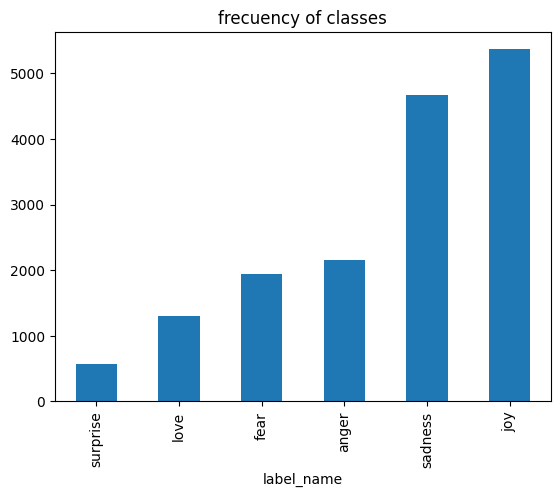

In [14]:
label_count.plot.bar() ## grafica la cantidad de elementos que hay en cada clases de forma verticar
plt.title('frecuency of classes')
plt.show()

<Axes: ylabel='label_name'>

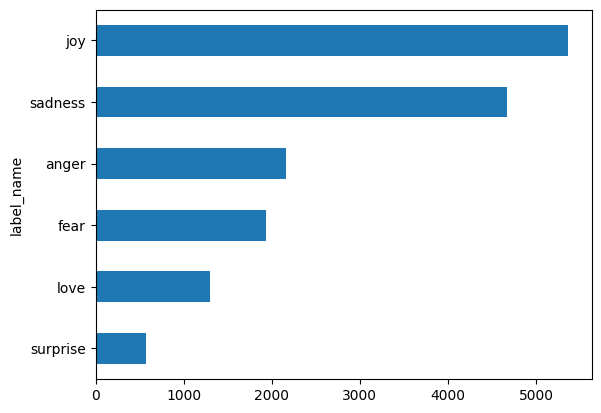

In [15]:
label_count.plot.barh() ## grafica la cantidad de elementos que hay en cada clases de forma horizontal

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

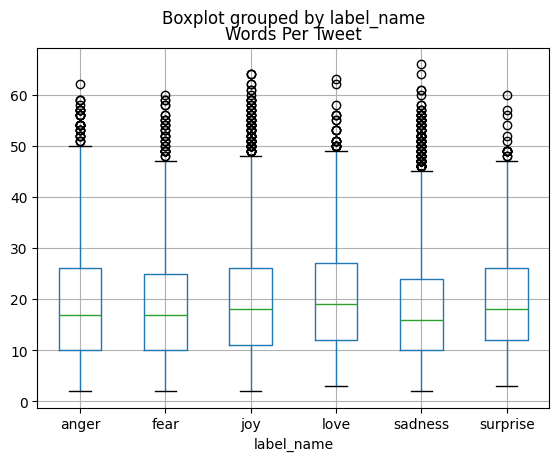

In [16]:
df['Words Per Tweet'] = df['text'].str.split().apply(len) ## Hace un conteo del numero de palabras o tokens que hay en cada texto
df.boxplot("Words Per Tweet", by='label_name') # Grafica el numeto aproximado de la longitud de los texts de cada clase. 

# ESTO ES SUPER IMPORTANTE YA QUE CON ESTO PODEMOS DEFINIR LA LONGITUD DE LOS EMBEDDINGS DE NUESTROS TRANSFORMERS, ESTO ES ALGO QUE GUARDAR MUY IMPORTANTE

In [17]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [18]:
text = "I love Machine Learning!. Tokenization is awesome"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 1012, 19204, 3989, 2003, 12476, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [19]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'machine', 'learning', '!', '.', 'token', '##ization', 'is', 'awesome', '[SEP]']


In [20]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 1000000000000000019884624838656)

## Tokenization of the emotion data

In [21]:
emotion.reset_format()
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [22]:
print((emotion["train"][:2]))

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': [0, 0]}


In [23]:
emotion

def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation = True)
    return temp

print(tokenize(emotion["train"][:3]))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [24]:
emotion_encoded = emotion.map(tokenize, batched=True, batch_size=None)

In [25]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Model Building

In [26]:
text = "I love Machine Learning!. Tokenization is awesome"

In [27]:
inputs = tokenizer(text,return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,   999,  1012, 19204,  3989,  2003,
         12476,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [28]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

In [29]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [30]:
with torch.no_grad():
    outputs = model(**inputs)

lass_hidden_states = outputs.last_hidden_state

In [31]:
lass_hidden_states.shape

torch.Size([1, 12, 768])

# Fine-Tuning Transformers

In [32]:
from transformers import AutoModelForSequenceClassification

In [33]:
num_labels = len(classes)

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
device

device(type='cuda')

In [35]:
from transformers import TrainingArguments

In [36]:
batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=2,
                                 learning_rate = 2e-5,
                                 per_device_eval_batch_size= batch_size,
                                 per_device_train_batch_size = batch_size,
                                 weight_decay = 0.01,
                                 evaluation_strategy = 'epoch',
                                 disable_tqdm = False)

In [45]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels,preds,average="weighted")
    acc = accuracy_score(labels,preds)
    return {'accuracy': acc,'f1':f1}

In [46]:
from transformers import Trainer

trainer = Trainer(model = model, args= training_args,
                 compute_metrics = compute_metrics,
                 train_dataset=emotion_encoded['train'],
                 eval_dataset = emotion_encoded['validation'],
                 tokenizer=tokenizer)

In [47]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.167501,0.931500,0.932053
2,0.107800,0.150294,0.937500,0.937538


TrainOutput(global_step=500, training_loss=0.1078392562866211, metrics={'train_runtime': 138.7381, 'train_samples_per_second': 230.65, 'train_steps_per_second': 3.604, 'total_flos': 720342861696000.0, 'train_loss': 0.1078392562866211, 'epoch': 2.0})

In [49]:
preds_outputs = trainer.predict(emotion_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.17067281901836395,
 'test_accuracy': 0.9225,
 'test_f1': 0.922601205177292,
 'test_runtime': 2.2949,
 'test_samples_per_second': 871.481,
 'test_steps_per_second': 13.944}

In [51]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis = 1)
y_true = emotion_encoded['test'][:]['label']

In [52]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true,y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       581
           1       0.96      0.93      0.94       695
           2       0.79      0.86      0.82       159
           3       0.93      0.91      0.92       275
           4       0.86      0.91      0.89       224
           5       0.79      0.68      0.73        66

    accuracy                           0.92      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



In [54]:
label_count

label_name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

In [70]:
text = "I hate you"

In [71]:
input_encoded = tokenizer(text,return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model(**input_encoded)

In [72]:
outputs
logits = outputs.logits
pred = torch.argmax(logits,dim=1).item()
pred, classes[pred]

(3, 'anger')